**Software S.A -  Análise de Churn** 📑

A empresa Software S.A é do ramo de tecnologia e oferece soluções no modelo Software as a Service (SaaS). Os clientes utilizam o sistema da empresa por meio de assinaturas, em geral com pagamentos recorrentes mensais, trimestrais ou anuais.

O produto principal da Software S.A é um sistema de ERP (Enterprise Resource Planning), um tipo de software utilizado por pequenas e médias empresas para gerenciar rotinas administrativas, como emissão de notas fiscais, controle de estoque, financeiro, entre outras. Nos últimos meses, alguns colaboradores levantaram a hipótese de que a taxa de churn (cancelamento de assinaturas) da plataforma estaria aumentando. Eles relatam que os clientes fazem o seguinte fluxo no momento do churn:

Vencimento do período de contrato ➜ Overdue (contrato em atraso) ➜ Churn (não renovação do contrato)

**A empresa me contratou como Analista de Dados para investigar essa tendência e reportar a eles os achados relevantes para reverter a situação.** Disponibilizaram para mim um conjunto de bases de dados em Excel contendo informações sobre os assinantes e seus respectivos eventos dentro da plataforma.

**O objetivo desse projeto é validar a hipótese de aumento da taxa de churn, levantar possíveis causas dessa rotatividade e ajudar as equipes de negócio a compreender melhor o comportamento dos clientes ao longo do tempo, que é essencial para manter uma base de usuários ativa e engajada no modelo de contratos por assinatura.**

Sendo assim, alinhei com a empresa as seguintes entregas:

1.	Validar a hipótese levantada sobre o aumento do churn;
2.	Realizar análise para identificar padrões, aderência dos clientes ao sistema e outras informações relevantes para apoiar a equipe de negócios;
3.	Elaborar uma apresentação corporativa com os principais insights obtidos.

In [73]:
#importar algumas bibliotecas de pyton que serão úteis - importantes para fazer operações matemáticas e transformação dos dados
import pandas as pd #serve para manipular os dados
import seaborn as sns #serve para conseguir manipular os gráficos
import numpy as np #operações numpy são as operações matemáticas
import matplotlib.pyplot as plt #manipular gráficos principalmente boxplot
import plotly.express as px

In [74]:
#importar o arquivo DATAFRAME DF que será a base de dados para o notebook
df= pd.read_csv("customer_churn_with_months.csv")

## Descrição das Variáveis

| Variável                                                        | Descrição                                                                                 |
|------------------------------------------------------------------|-------------------------------------------------------------------------------------------|
| **ID**                                                           | Identificador único para cada cliente.                                                   |
| **Tipo de empresa**                                              | Categoria da empresa de acordo com o porte (micro ou pequena empresa)     |
| **Fundação da empresa**                                          | Ano de fundação da empresa.                                                              |
| **Possui mais de um sócio**                                      | Indica se a empresa possui mais de um sócio (Sim/Não).                                   |
| **Funcionários**                                                 | Número de funcionários na empresa dividos em duas categorias, de até 5 funcionários ou 6 ou mais.                                |
| **mes_churn**                                                  | Indica qual mês houve o cancelamento do contrato.                                                   |
| **Meses de permanência**                                         | Quantidade de meses que o cliente permaneceu com o serviço, desde o início do contrato até maio de 2025.                         |
| **Utiliza serviços financeiros**                                 | Indica se a empresa utiliza o módulo de serviços financeiros do sistema (Sim/Não).                              |
| **PossuiContador**                                               | Indica se a empresa possui contador (Sim/Não).                                           |
| **Faz conciliação bancária**                                     | Indica como a empresa realiza conciliação bancária com o sistema, se de forma manual, automática ou se não faz               |
| **Frequência: Módulo financeiro**                                | Frequência de utilização do módulo financeiro do sistema (ex: Pouco uso, Uso frequente). |
| **Frequência: Emissão de nota fiscal**                           | Frequência de utilização do módulo de emissão de nota fiscal no sistema.                           |
| **Frequência: Integração bancária**                              | Frequência de utilização do módulo de integração bancária no sistema.                              |
| **Frequência: Módulo de vendas**                                 | Frequência de utilização do módulo de vendas no sistema.                                 |
| **Frequência: Relatórios**                                       | Frequência de utilização do módulo de relatórios no sistema.                                       |
| **Frequência: APIs de integração**                               | Frequência de utilização de APIs de integração no sistema.                               |
| **Contrato**                                                     | Tipo de contrato com o cliente, que pode ser Mensal, Trimestral ou Anual.                       |
| **Emite boletos**                                                | Indica se a empresa utiliza o módulo de emissão de boletos (Sim/Não).                                       |
| **Tipo de pagamento**                                            | Método de pagamento utilizado pelo cliente.                                              |
| **Receita mensal**                                               | Receita mensal gerada pelo cliente.                                                      |
| **Receita total**                                                | Receita total acumulada pelo cliente ao longo da permanência.                            |
| **Churn**                                                        | Indica se houve churn (cancelamento) do cliente (Sim/Não).                               |


# **1.Exploração univariada**

### **1.1 Análise geral**
Entender os tipos de variável das colunas, investigar valores únicos, verificar valores ausentes ou nulos, verificar a qualidade dos dados (por exemplo: escrita inconsistente, zeros onde não deveriam existir, unidades inconsistentes) e analisar a distribuição das variáveis categóricas e numéricas nas colunas do dataframe.

In [75]:
df #mostra o dataframe importado pelo comando read, nesse caso vemos que tem 7043 linhas de dados e 23 colunas.

,ID,Tipo de empresa,Fundação da empresa,Possui mais de um sócio,Funcionários,Meses de permanência,Utiliza serviços financeiros,PossuiContador,Faz conciliação bancária,Frequência de utilização de feature do sistema: Módulo financeiro,...,Frequência de utilização de feature do sistema: Relatórios,Frequência de utilização de feature do sistema: Utilização de APIs de integração,Contrato,Emite boletos,Emite boletos.1,Tipo de pagamento,Receita mensal,Receita total,Churn,mes_churn
0,1,Micro empresa,2016,Sim,até 5 funcionários,1,Não,NaN,automática,Pouco uso,...,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,29.85,29.85,Não,NaN
1,2,Pequena empresa,2018,Não,até 5 funcionários,34,Sim,Não,automática,Uso frequente,...,Pouco uso,Pouco uso,Trimestral,0,No,Boleto - mês a mês,56.95,1889.50,Não,NaN
2,4,Pequena empresa,2016,Não,até 5 funcionários,45,Não,NaN,automática,Uso frequente,...,Pouco uso,Pouco uso,Trimestral,0,No,Cartão de crédito - pagamento único,42.30,1840.75,Não,NaN
3,7,Pequena empresa,2019,Não,6 ou mais funcionários,22,Sim,Sim,manual,Pouco uso,...,Uso frequente,Pouco uso,Mês-a-mês,1,Yes,Cartão de crédito - mês a mês,89.10,1949.40,Não,NaN
4,8,Micro empresa,2019,Não,até 5 funcionários,10,Não,NaN,automática,Uso frequente,...,Pouco uso,Pouco uso,Mês-a-mês,0,No,Boleto - mês a mês,29.75,301.90,Não,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4308,Micro empresa,2014,Não,até 5 funcionários,37,Sim,Sim,manual,Pouco uso,...,Uso frequente,Uso frequente,Mês-a-mês,1,Yes,Boleto - pagamento único,96.55,3580.30,Sim,05/2025
7039,4950,Pequena empresa,2020,Não,até 5 funcionários,5,Não,NaN,automática,Pouco uso,...,Uso frequente,Uso frequente,Mês-a-mês,1,Yes,Boleto - mês a mês,51.00,305.95,Sim,05/2025
7040,3303,Pequena empresa,2016,Não,até 5 funcionários,31,Sim,Sim,manual,Pouco uso,...,Uso frequente,Uso frequente,Trimestral,1,Yes,Boleto - pagamento único,103.45,3066.45,Sim,05/2025
7041,5548,Micro empresa,2016,Não,até 5 funcionários,3,Sim,Não,manual,Pouco uso,...,Uso frequente,Uso frequente,Mês-a-mês,1,Yes,Boleto - pagamento único,89.45,240.45,Sim,05/2025


In [76]:
#Visão geral dos tipos de dados (avaliar variáveis categóricas/numéricas), verificar duplicação, exemplo de valores e valores nulos. O isnull também é conhecido como NaN, null, missing.
#se rodar só isnull, ele irá retornar com o DF preenchido com falso e verdadeiro nas células. Se tiver vazio, vai aparecer TRUE e se tiver preenchido, vai aparecer FALSE.
#o comando sum irá somar os verdadeiros e retornará com a quantidade de vazios.
#o % de nulos é interessante para saber o quanto a ausência de informação pode impactar nas análises subsequentes

overview = pd.DataFrame({
    "Tipo": df.dtypes,
    "Nulos": df.isnull().sum(),
    "% Nulos": df.isnull().mean()*100,
    "Valores Únicos": df.nunique(),
    "Exemplo de Valores": df.apply(lambda x: x.unique()[:3])
})
overview

,Tipo,Nulos,% Nulos,Valores Únicos,Exemplo de Valores
ID,int64,0,0.000000,7043,"[1, 2, 4]"
Tipo de empresa,object,0,0.000000,2,"[Micro empresa, Pequena empresa]"
Fundação da empresa,int64,0,0.000000,21,"[2016, 2018, 2019]"
Possui mais de um sócio,object,0,0.000000,2,"[Sim, Não]"
Funcionários,object,0,0.000000,2,"[até 5 funcionários, 6 ou mais funcionários]"
Meses de permanência,int64,0,0.000000,73,"[1, 34, 45]"
Utiliza serviços financeiros,object,0,0.000000,2,"[Não, Sim]"
PossuiContador,object,682,9.683374,2,"[nan, Não , Sim]"
Faz conciliação bancária,object,0,0.000000,3,"[automática, manual, não faz]"
Frequência de utilização de feature do sistema: Módulo financeiro,object,0,0.000000,3,"[Pouco uso, Uso frequente, Nunca utilizou]"


Os tipos de dados presentes no datframe estão distribuídos entre números inteiros (int64), números decimais (float64) e texto (object). As colunas de números inteiros e decimais são as variáveis numéricas e as colunas de texto são as variáveis categóricas.

Alguns pontos de atenção sobre a qualidade dos dados:

* Colunas duplicadas para “Emite boletos”, uma como tipo número inteiro (0/1) e outra como texto (Yes/No).

* Valores “nan”, nulos, ou vazios em colunas críticas para essa análise como PossuiContador (10% nulo) e mes_churn (~73% nulo). Importante entender se está nulo porque ainda não houve churn ou se houve falha no input de dados.

* Colunas de variáveis categóricas com mistura de idiomas português/inglês (ex: Sim, Não,Yes, No). Importante haver padronização para facilitar análises futuras e agrupamento de dados quando necessário.

* Escrita longa para colunas, como "Frequência de uso de feature". É uma boa prática manter as colunas com nome sucinto para facilitar análises e agrupamentos de dados.

###**1.2 Análise individual**

Fiz uma análise individual de cada variável para entender melhor o perfil de clientes atendidos, ticket médio e sua aderência ao uso do software ERP através de estatística descritiva.

Entender o engajamento dos clientes com o software é importante para medir se a aderência ao uso pode ter relação com o churn, porque clientes menos engajados podem perceber menor valor do produto e buscar o cancelamento do contrato.

#### **Perfil de clientes**

##### Tipo de empresa

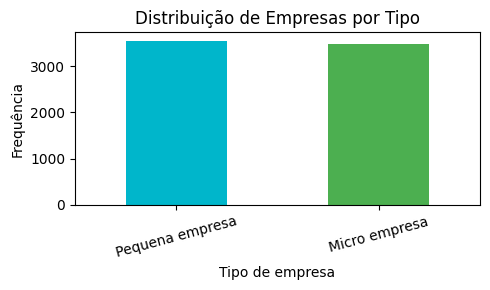

(Tipo de empresa
 Pequena empresa    3555
 Micro empresa      3488
 Name: count, dtype: int64,
 Tipo de empresa
 Pequena empresa    50.47565
 Micro empresa      49.52435
 Name: proportion, dtype: float64)

In [77]:
#análise da distribuição de valores na coluna 'Tipo de empresa' que é uma variável categórica

col = 'Tipo de empresa'

#frequência absoluta e relativa para avaliar a distribuição de clientes pelo tipo de empresa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100

#plotar gráfico de barras com a distribuição
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#00B6CB','#4CAF50'])
plt.title('Distribuição de Empresas por Tipo')
plt.xlabel('Tipo de empresa')
plt.ylabel('Frequência')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

abs_freq, rel_freq

A distribuição de clientes entre as categorias de empresa é muito equilibrada, em que 50,5% são pequenas empresas e 49,5% são micro empresas. Isso pode indicar que o produto atende de forma satisfatória ambos os tipos de cliente.

**É uma boa variável para correlação  com churn, pois empresas de portes diferentes podem ter comportamento distinto em relação ao cancelamento de contrato.**

##### Fundação da empresa

Valores únicos: [np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021)]
Top 5 anos de fundação:
Fundação da empresa
2016    1029
2018     990
2019     982
2021     975
2017     969
Name: count, dtype: int64


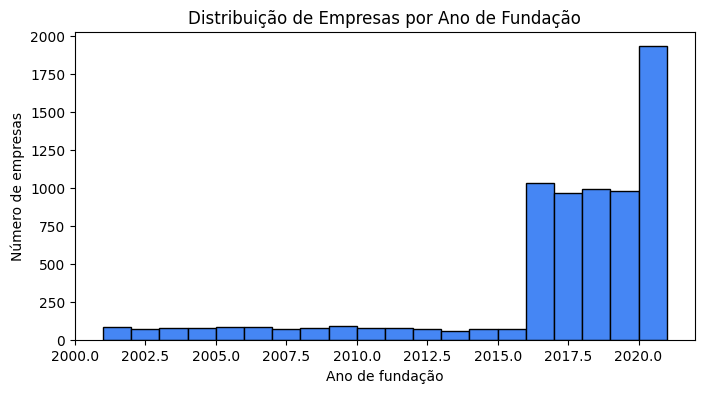

In [78]:
#mostrar valores únicos na coluna
col = 'Fundação da empresa'
anos = df[col]
print("Valores únicos:", sorted(anos.unique()))


#contagem dos top 5 anos mais comuns de fundação
top_anos = anos.value_counts().head(5)
print("Top 5 anos de fundação:")
print(top_anos)

#construção histograma para visualizar a distribuição de clientes pelo ano de fundação da empresa
plt.figure(figsize=(8,4))
plt.hist(anos, bins=20, color='#4586F4',edgecolor='black')
plt.title('Distribuição de Empresas por Ano de Fundação')
plt.xlabel('Ano de fundação')
plt.ylabel('Número de empresas')
plt.show()

As empresas da base de dados foram fundadas entre 2001 e 2021, sendo os anos de fundação mais frequentes entre 2016 e 2021. Os cinco anos com maior número de fundações representam a maior parte das empresas.

A média de fundação é aproximadamente 2016 e a mediana é 2018. O desvio padrão não é alto, indicando que a maioria das empresas tem ano de fundação distante de 4,5 anos da média.

##### Possui mais de um sócio

Frequência absoluta:
 Possui mais de um sócio
Não    3641
Sim    3402
Name: count, dtype: int64

Frequência relativa (%):
 Possui mais de um sócio
Não    51.69672
Sim    48.30328
Name: proportion, dtype: float64


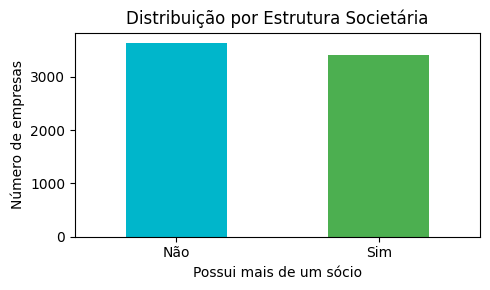

In [79]:
#análise da distribuição de valores na coluna de sócios

col = 'Possui mais de um sócio'

#frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100
print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

#plotar gráfico de barras para visualizar a distribuição
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#00B6CB','#4CAF50'])
plt.title('Distribuição por Estrutura Societária')
plt.xlabel('Possui mais de um sócio')
plt.ylabel('Número de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Em termos de distribuição, a maioria das empresas não possui mais de um sócio:

* 3.641 empresas (51,7%) marcaram “Não”.
* 3.402 empresas (48,3%) marcaram “Sim”.

As categorias estão bastante equilibradas, o que é compatível com a predominância de pequena e micro empresa. Apesar do equilíbrio, a base contempla um bom número de empresas com estrutura societária mais robusta.

##### Possui Contador

Frequência absoluta (incluindo nulos):
 PossuiContador
Não     3390
Sim     2971
NaN      682
Name: count, dtype: int64

Frequência relativa (%):
 PossuiContador
Não     48.132898
Sim     42.183729
NaN      9.683374
Name: proportion, dtype: float64


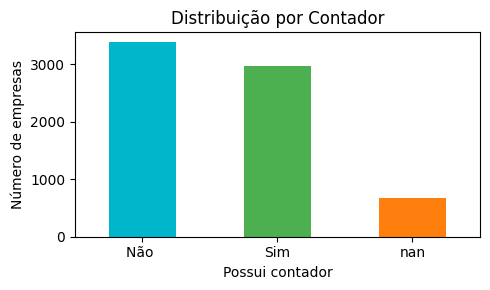

In [80]:
col = 'PossuiContador'

#frequência absoluta e relativa incluindo nulos 'nan'
abs_freq = df[col].value_counts(dropna=False)
rel_freq = df[col].value_counts(normalize=True, dropna=False) * 100
print("Frequência absoluta (incluindo nulos):\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

#gráfico de barras com nulo incluso 'nan'
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#00B6CB','#4CAF50', '#ff7f0e'])
plt.title('Distribuição por Contador')
plt.xlabel('Possui contador')
plt.ylabel('Número de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Dos 7.043 registros, há uma quantidade significativa de valores ausentes.

A distribuição real é:

* 3.390 empresas não possuem contador (48,1%)
* 2.971 empresas possuem contador (42,2%)
* 682 empresas não possuem o dado (9,7%)

O gráfico mostra a presença relevante de dados ausentes, além de uma pequena maioria de empresas que não possuem contador. A presença de quase 10% de valores nulos pode indicar uma lacuna de integração de dados, clientes recém-cadastrados ou empresas que ainda não definiram se têm contador.

#####  Funcionários

Frequência absoluta :
 Funcionários
até 5 funcionários        4933
6 ou mais funcionários    2110
Name: count, dtype: int64

Frequência relativa (%):
 Funcionários
até 5 funcionários        70.041176
6 ou mais funcionários    29.958824
Name: proportion, dtype: float64


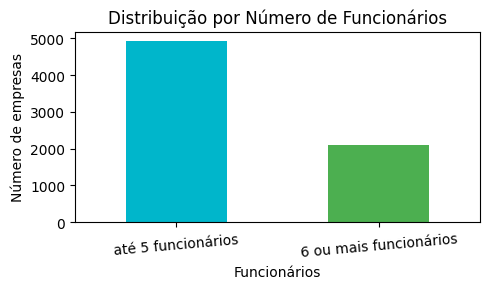

In [81]:
#análise da distribuição de valores na coluna funcionário

col = 'Funcionários'
func = df[col]

#frequência absoluta e relativa dos valores
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100
print("Frequência absoluta :\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

##plotar gráfico de barras para visualizar a distribuição
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#00B6CB','#4CAF50'])
plt.title('Distribuição por Número de Funcionários')
plt.xlabel('Funcionários')
plt.ylabel('Número de empresas')
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()

A variável Funcionários é categórica e indica o porte da empresa em relação ao número de funcionários. Não há valores ausentes nem inconsistentes.

* 4.933 empresas (70,0%) possuem até 5 funcionários.
* 2.110 empresas (30,0%) possuem 6 ou mais funcionários.

A distribuição mostra que a grande maioria das empresas possui até 5 funcionários, que está de acordo com os tipos de empresa da base de dados.

É uma variável que pode ser usada para correlação com churn, porque empresas menores podem ter um comportamento diferente das maiores em relação à renovação de contratos.

#####  Contrato

Frequência absoluta:
 Contrato
Mês-a-mês     3875
Anual         1695
Trimestral    1473
Name: count, dtype: int64

Frequência relativa (%):
 Contrato
Mês-a-mês     55.019168
Anual         24.066449
Trimestral    20.914383
Name: proportion, dtype: float64


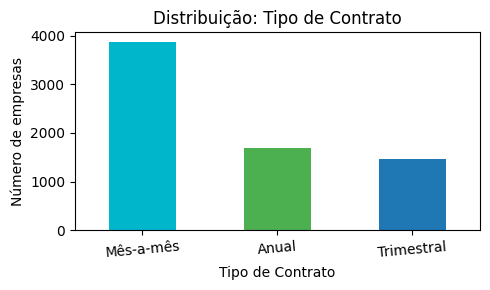

In [82]:
col = 'Contrato'

#frequência absoluta e relativa dos valores
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100
print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

#gráfico de barras para distribuição
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#00B6CB','#4CAF50','#1f77b4'])
plt.title('Distribuição: Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de empresas')
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()

A distribuição dos tipos de contrato é:

* Mês-a-mês: 3.875 empresas (55,0%)
* Anual: 1.695 empresas (24,1%)
* Trimestral: 1.473 empresas (20,9%)

Pouco mais da metade dos clientes possui contrato mensal, enquanto a outra metade está dividida entre planos anuais e trimestrais.

**Essa variável é estratégica para análise de engajamento e risco de churn. Clientes anuais e trimestrais tendem a ter maior retenção. Enquanto clientes mensais podem ter maior risco de cancelamento, pois podem ser empresas menores com menor previsibilidade de receita.**

##### Tipo de pagamento

Frequência absoluta:
 Tipo de pagamento
Boleto - pagamento único               2365
Boleto - mês a mês                     1612
Cartão de crédito - pagamento único    1544
Cartão de crédito - mês a mês          1522
Name: count, dtype: int64

Frequência relativa (%):
 Tipo de pagamento
Boleto - pagamento único               33.579441
Boleto - mês a mês                     22.887974
Cartão de crédito - pagamento único    21.922476
Cartão de crédito - mês a mês          21.610109
Name: proportion, dtype: float64


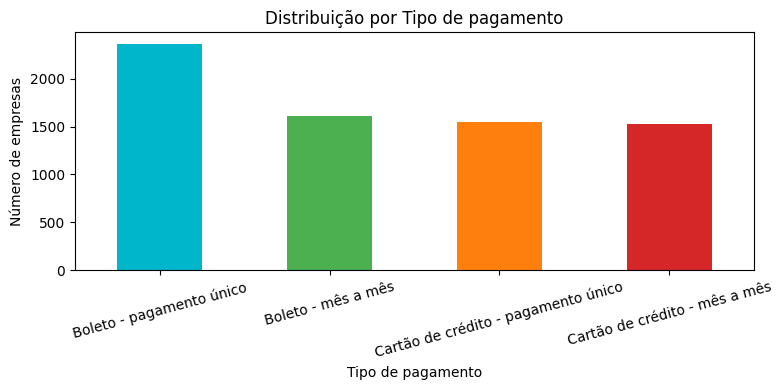

In [83]:
col = 'Tipo de pagamento'

#frequência absoluta e relativa dos valores
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100
print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

#gráfico de barras para distribuição
plt.figure(figsize=(8,4))
abs_freq.plot(kind='bar', color=['#00B6CB','#4CAF50', '#ff7f0e','#d62728'])
plt.title('Distribuição por Tipo de pagamento')
plt.xlabel('Tipo de pagamento')
plt.ylabel('Número de empresas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

A coluna Tipo de pagamento se refere ao método e periodicidade escolhidos para pagamento da assinatura.

A distribuição entre os tipos é a seguinte:

* Boleto – pagamento único: 2.365 empresas (33,6%)
* Boleto – mês a mês: 1.612 empresas (22,9%)
* Cartão de crédito – pagamento único: 1.544 empresas (21,9%)
* Cartão de crédito – mês a mês: 1.522 empresas (21,6%)

O método “boleto – pagamento único” é o mais comum, seguido por todas as outras categorias em proporções próximas. Essa distribuição sugere que os clientes tem diferentes perfis de fluxo de caixa, que podem tanto quitar a vista em pagamento único ou parcelar em boleto ou cartão.

**Essa variável também é interessante para correlação com churn, porque os tipos de pagamento impactam diretamente na inadimplência e renovação das assinaturas.**

#### **Aderência ao uso do sistema**

#####  Meses de permanência

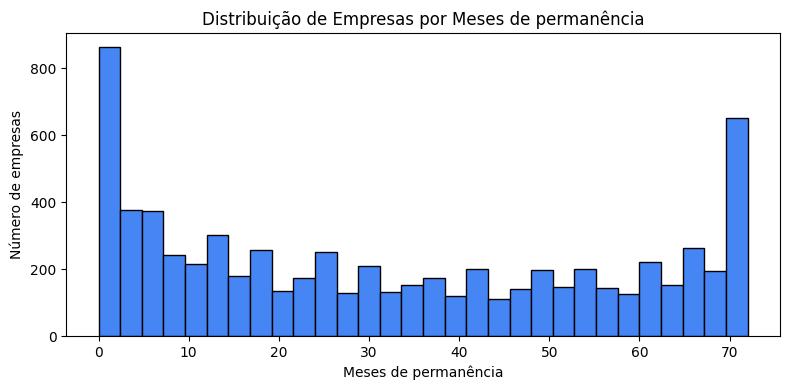

(count    7043.000000
 mean       32.371149
 std        24.559481
 min         0.000000
 25%         9.000000
 50%        29.000000
 75%        55.000000
 max        72.000000
 Name: Meses de permanência , dtype: float64,
 73,
 0,
 72)

In [84]:
col = 'Meses de permanência '

#descrever as principais estatísticas da coluna
desc = df[col].describe()

#quantidade de valores únicos
valores_unicos = df[col].nunique()

#verificar outliers
valores_min = df[col].min()
valores_max = df[col].max()

#plotar histograma para ver a distribuição por segmento
plt.figure(figsize=(8,4))
plt.hist(df[col], bins=30, color='#4586F4',edgecolor='black')
plt.title('Distribuição de Empresas por Meses de permanência')
plt.xlabel('Meses de permanência')
plt.ylabel('Número de empresas')
plt.tight_layout()
plt.show()

desc, valores_unicos, valores_min, valores_max

Não há valores ausentes ou outliers. Alguns poucos casos com “0 meses” indicam clientes que podem ter churn imediato ou há inconsistência no registro, vale investigar se são de fato registros válidos ou erro de integração.

A distribuição apresenta as seguintes estatísticas:

* Mínimo: 0 meses (provável cliente recém-cadastrado ou cancelado imediatamente)
* Máximo: 72 meses (6 anos de permanência)
* Média: 32,4 meses (aproximadamente 2 anos e 8 meses)
* Mediana: 29 meses (metade dos clientes ficou menos de 2 anos e 5 meses)
* Desvio padrão: 24,6 meses
* Valores únicos: 73 (indicando alta dispersão)

O histograma mostra concentração maior nas faixas iniciais de até 10 meses(menor tempo de permanência), com queda acentuada formando uma cauda longa à direita e se mantém relativamente estável entre 10 e 60 meses. O aumento no final da distribuição sugere que há um grupo considerável de clientes antigos e fidelizados ao serviço.

**A alta distribuição inicial se mostra compatível com o comportamento esperado de churn em serviços recorrentes, em que muitos entram e saem rápido, e uma minoria se mantém ativa por vários anos. Essa variável é fundamental para análise de ciclo de vida do cliente e previsão de churn.**

#####  Utiliza serviços financeiros

Frequência absoluta:
 Utiliza serviços financeiros
Sim    6361
Não     682
Name: count, dtype: int64

Frequência relativa (%):
 Utiliza serviços financeiros
Sim    90.316626
Não     9.683374
Name: proportion, dtype: float64


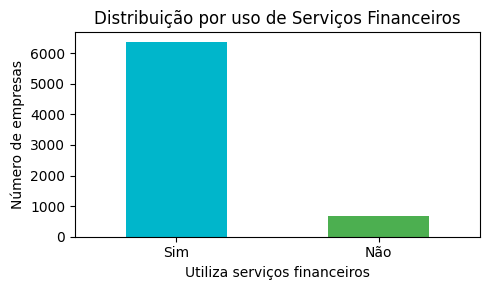

In [85]:
col = 'Utiliza serviços financeiros'

#frequência absoluta e relativa dos valores
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100
print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

#plotar gráfico de barras para distribuição
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#00B6CB','#4CAF50'])
plt.title('Distribuição por uso de Serviços Financeiros')
plt.xlabel('Utiliza serviços financeiros')
plt.ylabel('Número de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

A variável Utiliza serviços financeiros é categórica binária, indicando se a empresa faz uso dos serviços financeiros disponibilizados no sistema.

Em termos de distribuição, há um total de 6.361 empresas (90,3%) que utilizam serviços financeiros e 682 empresas (9,7%) que não utilizam. Isso pode indicar que a contratação desses serviços é o padrão, e a não utilização é exceção.

**Essa variável é interessante para medir a aderência ao uso do sistema pelos clientes, já que o engajamento dos clientes pode ter relação com menor churn.**

#####  Faz conciliação bancária

Frequência absoluta:
 Faz conciliação bancária
manual        3096
automática    2421
não faz       1526
Name: count, dtype: int64

Frequência relativa (%):
 Faz conciliação bancária
manual        43.958540
automática    34.374556
não faz       21.666903
Name: proportion, dtype: float64


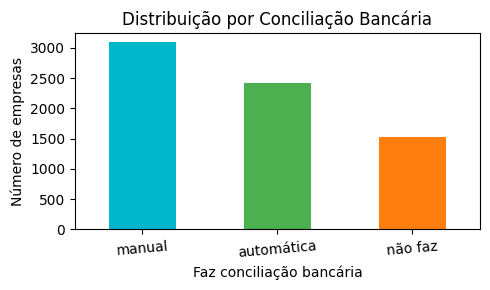

In [86]:
col = 'Faz conciliação bancária'

#frequência absoluta e relativa dos valores
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100
print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

#distribuição em gráfico de barras
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#00B6CB','#4CAF50', '#ff7f0e'])
plt.title('Distribuição por Conciliação Bancária')
plt.xlabel('Faz conciliação bancária')
plt.ylabel('Número de empresas')
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()

A distribuição entre as categorias é:

* Conciliação manual: 3.096 empresas (44,0%)
* Conciliação automática: 2.421 empresas (34,4%)
* Não faz conciliação: 1.526 empresas (21,7%)

A maioria das empresas faz conciliação bancária manual, seguida por uma parcela significativa que automatiza esse processo. Quase um quarto dos clientes não faz conciliação bancária, que pode ser um grupo com menor organização operacional.

**É uma variável relevante para entender o grau de maturidade operacional e automação do cliente.**

##### Emite boletos

Comparação das colunas "Emite boletos" e "Emite boletos.1" para avaliar se são equivalentes ou não. Essa coluna também é sobre uso dessa funcionalidade no sistema.

In [87]:
#visualizar os valores únicos da coluna textual
print("Valores únicos em Emite boletos.1:", df['Emite boletos.1'].unique())

#comparar se são equivalentes (depois de mapear Yes/No para 1/0)
col_bin = df['Emite boletos']
col_txt = df['Emite boletos.1'].map({'Yes': 1, 'No': 0})

diferentes = (col_bin != col_txt).sum()
print(f"Número de linhas diferentes: {diferentes}")

Valores únicos em Emite boletos.1: ['Yes' 'No']
Número de linhas diferentes: 0


Frequência absoluta:
 Emite boletos.1
Yes    4171
No     2872
Name: count, dtype: int64

Frequência relativa (%):
 Emite boletos.1
Yes    59.221922
No     40.778078
Name: proportion, dtype: float64


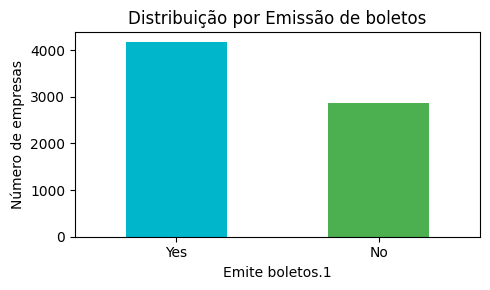

In [88]:
#como as colunas são equivalentes, seguirei somente com uma para análise.

col = 'Emite boletos.1'

#frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100
print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

#gráfico de barras para distribuição dos valores
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#00B6CB','#4CAF50'])
plt.title('Distribuição por Emissão de boletos')
plt.xlabel('Emite boletos.1')
plt.ylabel('Número de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Os clientes estão distribuídos entre:

Emitem boletos (Yes): 4.171 empresas (59,2%)

Não emitem boletos (No): 2.872 empresas (40,8%)

A maioria dos clientes utiliza a emissão de boletos, enquanto quase 41% não usam essa função. **A emissão de boletos pode indicar clientes com maior fluxo de caixa, sendo uma variável importante para nossa análise de churn.**

##### Frequência de utilização de feature do sistema: Módulo financeiro

Frequência absoluta:
 Frequência de utilização de feature do sistema: Módulo financeiro
Pouco uso         3498
Uso frequente     2019
Nunca utilizou    1526
Name: count, dtype: int64

Frequência relativa (%):
 Frequência de utilização de feature do sistema: Módulo financeiro
Pouco uso         49.666335
Uso frequente     28.666761
Nunca utilizou    21.666903
Name: proportion, dtype: float64


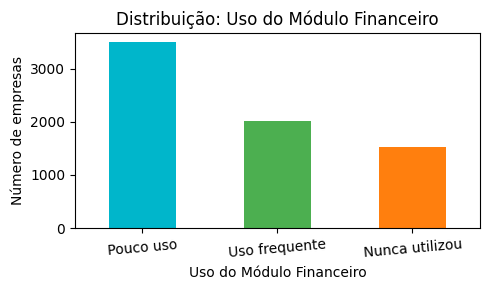

In [89]:
#variável útil para medir engajamento com o sistema

col = 'Frequência de utilização de feature do sistema: Módulo financeiro'

#frequência absoluta e relativa dos valores
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100
print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

#gráfico de barras para distribuição
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#00B6CB','#4CAF50', '#ff7f0e'])
plt.title('Distribuição: Uso do Módulo Financeiro')
plt.xlabel('Uso do Módulo Financeiro')
plt.ylabel('Número de empresas')
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()

Todos os registros estão preenchidos, sem nulos ou respostas fora do padrão.

A distribuição é a seguinte:

* Pouco uso: 3.498 empresas (49,7%)
* Uso frequente: 2.019 empresas (28,7%)
* Nunca utilizou: 1.526 empresas (21,7%)

A análise mostra que 71,2% dos clientes faz pouco uso ou nunca usou esse módulo do sistema, enquanto somente 28,7% das empresas usam frequentemente essa feature. As empresas que fazem pouco uso representam 49,7%.

**Essa variável pode indicar o nível de engajamento do cliente e tem alto potencial de correlação positiva com churn. Em que as empresas que nunca utilizaram tem mais chance de cancelar a assinatura.**

#####  Frequência de utilização de feature do sistema: Emissão de nota fiscal

Frequência absoluta:
 Frequência de utilização de feature do sistema: Emissão de nota fiscal
Pouco uso         3088
Uso frequente     2429
Nunca utilizou    1526
Name: count, dtype: int64

Frequência relativa (%):
 Frequência de utilização de feature do sistema: Emissão de nota fiscal
Pouco uso         43.844952
Uso frequente     34.488144
Nunca utilizou    21.666903
Name: proportion, dtype: float64


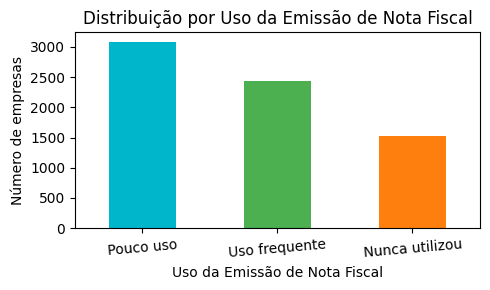

In [90]:
col = 'Frequência de utilização de feature do sistema: Emissão de nota fiscal'

#frequência absoluta e relativa dos valores
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100

print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

#gráfico de barras para distribuição
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#00B6CB','#4CAF50', '#ff7f0e'])
plt.title('Distribuição por Uso da Emissão de Nota Fiscal')
plt.xlabel('Uso da Emissão de Nota Fiscal')
plt.ylabel('Número de empresas')
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()

Todos os dados estão presentes, sem valores nulos ou respostas fora do padrão.

A maior parte dos clientes utiliza pouco a emissão de nota fiscal. Um grupo expressivo (34,5%) faz uso frequente, enquanto pouco mais de um quinto nunca usou essa funcionalidade — o que pode indicar empresas com menor organização operacional.

Essa variável é importante para entender o engajamento e o perfil do cliente: uso frequente tende a indicar empresas mais organizadas ou com maior fluxo de vendas. **O grupo que nunca utilizou provavelmente tem baixo engajamento e pode ser mais propenso ao churn.**

#####  Demais variáveis de frequência de uso

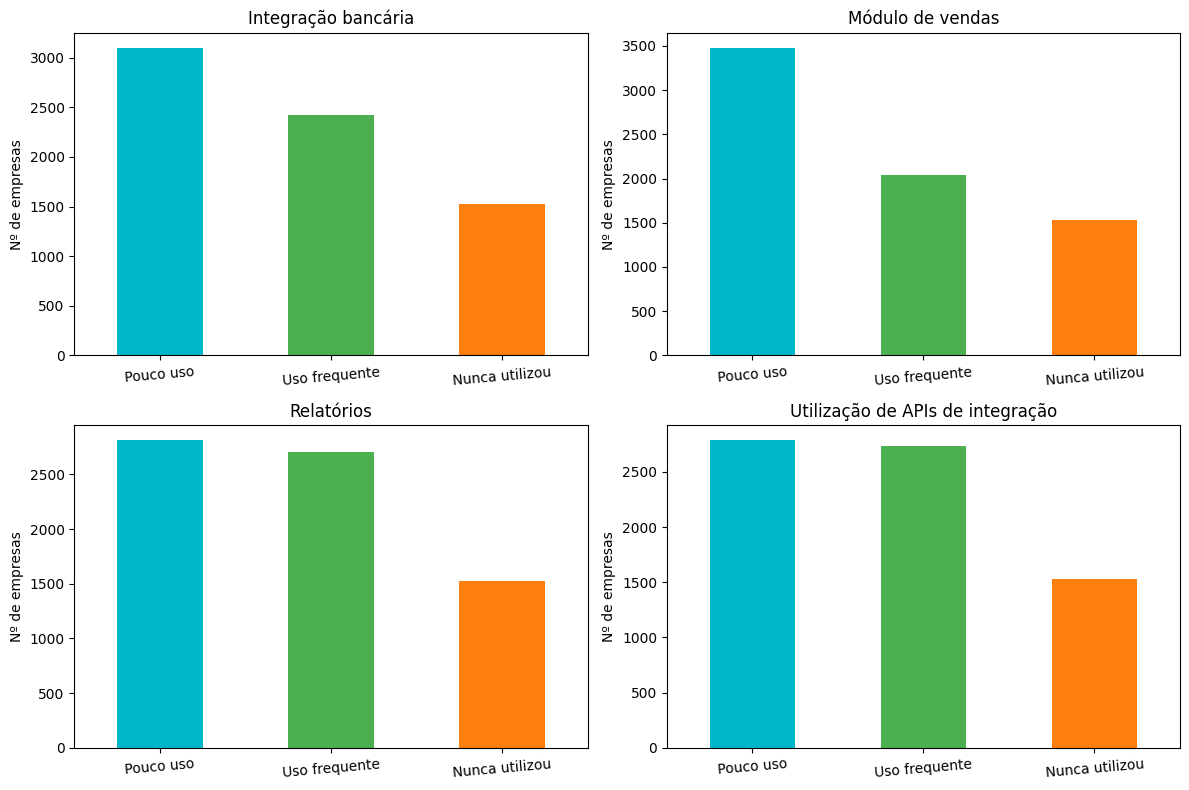

{'Frequência de utilização de feature do sistema: Integração bancária': Frequência de utilização de feature do sistema: Integração bancária
 Pouco uso         3095
 Uso frequente     2422
 Nunca utilizou    1526
 Name: count, dtype: int64,
 'Frequência de utilização de feature do sistema: Módulo de vendas': Frequência de utilização de feature do sistema: Módulo de vendas
 Pouco uso         3473
 Uso frequente     2044
 Nunca utilizou    1526
 Name: count, dtype: int64,
 'Frequência de utilização de feature do sistema: Relatórios': Frequência de utilização de feature do sistema: Relatórios
 Pouco uso         2810
 Uso frequente     2707
 Nunca utilizou    1526
 Name: count, dtype: int64,
 'Frequência de utilização de feature do sistema: Utilização de APIs de integração': Frequência de utilização de feature do sistema: Utilização de APIs de integração
 Pouco uso         2785
 Uso frequente     2732
 Nunca utilizou    1526
 Name: count, dtype: int64}

In [91]:
#análise agrupada da frequência de utilização das demais features do sistema - Integração bancária, Módulo de Vendas, Relatóriso e APIs de integração.

freq_cols = ['Frequência de utilização de feature do sistema: Integração bancária',
    'Frequência de utilização de feature do sistema: Módulo de vendas',
    'Frequência de utilização de feature do sistema: Relatórios',
    'Frequência de utilização de feature do sistema: Utilização de APIs de integração']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(freq_cols):
    abs_freq = df[col].value_counts()
    ax = axs[i//2, i%2]
    abs_freq.plot(kind='bar', color=['#00B6CB','#4CAF50', '#ff7f0e'], ax=ax)
    ax.set_title(col.replace('Frequência de utilização de feature do sistema: ', ''))
    ax.set_ylabel('Nº de empresas')
    ax.set_xlabel('')
    ax.set_xticklabels(abs_freq.index, rotation=5)
plt.tight_layout()
plt.show()

numeros_reais = {col: df[col].value_counts() for col in freq_cols}
numeros_reais

Para todos esses módulos, há um mesmo grupo de 1526 clientes que nunca utilizaram nenhum deles, totalizando 21,6%. Isso indica que há um segmento fixo de clientes que podem só usar as funções básicas do sistema, que podem não conhecer o funcionamento dos módulos ou que tem baixa adoção de tecnologia.

Para integração bancária e vendas, há uma maior distribuição de clientes que pouco usam, em torno de e 43,9% (3095) e 49,3% (3473) respectivamente.

Em relatórios e APIs, a distribuição entre 'Pouco uso' e 'Uso frequente' é bem próxima, 38,4% (2.707) e 38,7% (2.732) usando frequentemente contra 39,9% (2.810) e 39,5% (2.785) usando pouco, respectivamente.


**Essas variáveis podem indicar aderência ao sistema e adoção de tecnologia, que podem estar relacionados ao churn.**

#### **Ticket médio**

##### Receita mensal

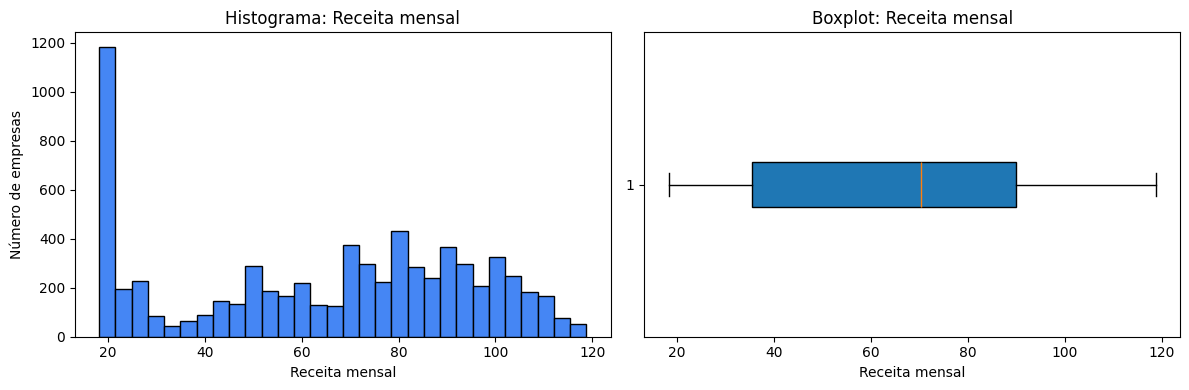

,Receita mensal
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [92]:
col = 'Receita mensal'

#descrever as principais estatísticas da coluna
desc = df[col].describe()

#plotar histograma e boxplot para distrubuição por receita
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(df[col].dropna(), bins=30, color='#4586F4', edgecolor='black')
axs[0].set_title('Histograma: Receita mensal')
axs[0].set_xlabel('Receita mensal')
axs[0].set_ylabel('Número de empresas')
axs[1].boxplot(df[col].dropna(), vert=False, patch_artist=True)
axs[1].set_title('Boxplot: Receita mensal')
axs[1].set_xlabel('Receita mensal')
plt.tight_layout()
plt.show()

desc

A variável Receita mensal representa o valor mensal pago por cada cliente. As estatísticas principais são:
* Média: R$ 64,76

* Mediana: R$ 70,35

* Desvio padrão: R$ 30,09

* Valor Mínimo: R$ 18,25

* Valor Máximo: R$ 118,75

A distribuição é compatível com o modelo de negócio, que são produtos voltados para pequenas e microempresas. A mediana está próxima à média, que indica que 50% dos clientes pagam até 70,35 reais por mês.

O histograma mostra um pico de clientes com receita mensal em torno de 20 a 30 reais, valores próximos ao mínimo. A distribuição é levemente assimétrica a direita, ou seja, existem poucos clientes que pagam mais caro na assinatura e uma proporção maior de clientes que pagam pouco.

##### Receita total

Valores nulos: 11 (0.16%)


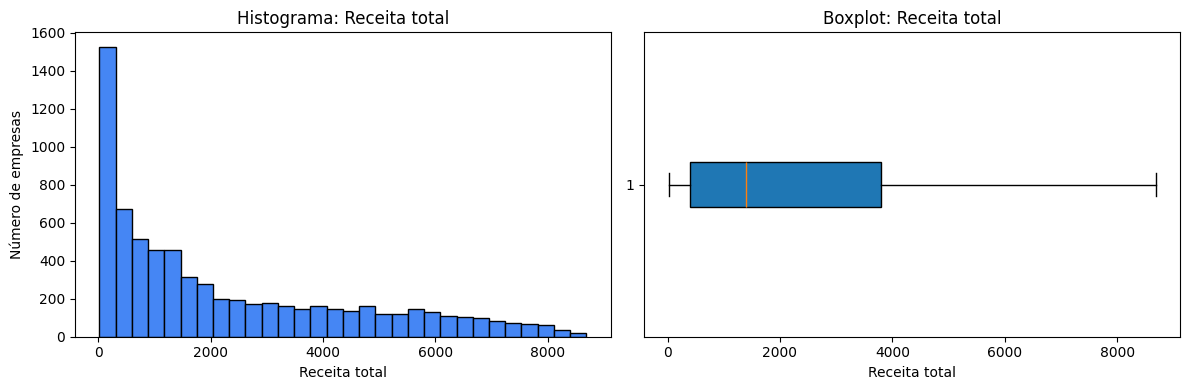

,Receita total
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


In [93]:
col = 'Receita total'

#estatísticas descritivas
desc = df[col].describe()

#valores nulos
missing = df[col].isnull().sum()
print(f'Valores nulos: {missing} ({missing/len(df)*100:.2f}%)')

#histograma e boxplot de distribuição
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(df[col].dropna(), bins=30, color='#4586F4', edgecolor='black')
axs[0].set_title('Histograma: Receita total')
axs[0].set_xlabel('Receita total')
axs[0].set_ylabel('Número de empresas')
axs[1].boxplot(df[col].dropna(), vert=False, patch_artist=True)
axs[1].set_title('Boxplot: Receita total')
axs[1].set_xlabel('Receita total')
plt.tight_layout()
plt.show()

desc

A variável Receita total representa a soma acumulada de receitas por cliente desde o início do contrato. Existem 11 valores nulos (0,16% da base), quantidade muito baixa e que não irá impactar a análise.

As estatísticas principais são:

* Média: R$ 2.283,30

* Mediana: R$ 1.397,48

* Desvio padrão: R$ 2.266,77

* Valor Mínimo: R$ 18,80

* Valor Máximo: R$ 8.684,80


O histograma mostra distribuição assimétrica, com muitos clientes concentrados em faixas baixas de receita total (reflexo direto do tempo de permanência e do ticket médio), e poucos clientes com valores muito altos (cauda longa à direita). O boxplot confirma essa assimetria à esquerda, mostrando alguns valores distantes da mediana, que são clientes antigos ou de alto valor, que ficaram mais tempo ou têm ticket mais alto.

**A receita total está muito relacionada com os meses de permanência. Quanto mais um cliente permanece no sistema, maior tende ser a receita total dele.**

#### **Cancelamento de contrato**

##### Churn

Frequência absoluta:
 Churn
Não    5174
Sim    1869
Name: count, dtype: int64

Frequência relativa (%):
 Churn
Não    73.463013
Sim    26.536987
Name: proportion, dtype: float64


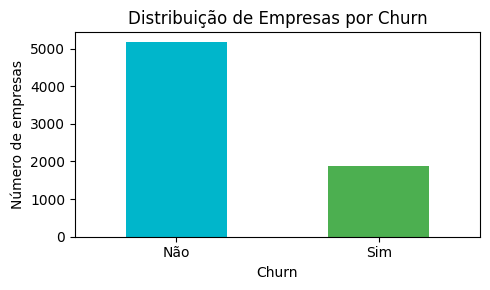

In [94]:
col = 'Churn'

#frequência absoluta e relativa
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100
print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

#gráfico de barras
plt.figure(figsize=(5,3))
abs_freq.plot(kind='bar', color=['#00B6CB','#4CAF50'])
plt.title('Distribuição de Empresas por Churn')
plt.xlabel('Churn')
plt.ylabel('Número de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


A distribuição das empresas pelo cancelamento é:

* Não (cliente ativo): 5.174 empresas (73,5%)
* Sim (churn): 1.869 empresas (26,5%)

O gráfico deixa claro que a maioria dos clientes está ativa, enquanto cerca de um quarto já cancelou o serviço. Esse desbalanceamento é típico de bases de clientes recorrentes, especialmente quando há crescimento ou retenção estável na base.

**Churn é a variável-alvo para todos os estudos de retenção, previsão de risco, valor de cliente e estratégia comercial.**

##### Mês churn

Frequência absoluta (incluindo nulos):
 mes_churn
NaN        5174
05/2025     958
04/2025     911
Name: count, dtype: int64

Frequência relativa (%):
 mes_churn
NaN        73.463013
05/2025    13.602158
04/2025    12.934829
Name: proportion, dtype: float64


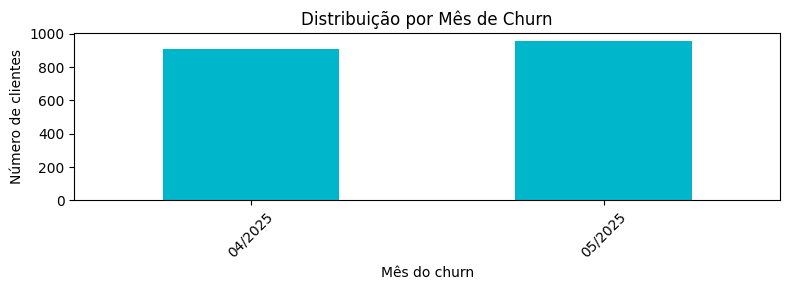

In [95]:
col = 'mes_churn'

#frequência dos valores incluindo nulos
abs_freq = df[col].value_counts(dropna=False)
rel_freq = df[col].value_counts(normalize=True, dropna=False) * 100
print("Frequência absoluta (incluindo nulos):\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

#gráfico de barras com apenas valores não nulos
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
df[col].dropna().value_counts().sort_index().plot(kind='bar', color='#00B6CB')
plt.title('Distribuição por Mês de Churn')
plt.xlabel('Mês do churn')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


A variável mes_churn indicando o mês em que o churn ocorreu para cada cliente. A maior parte dos registros está como nulo porque corresponde aos clientes ativos.



A distribuição real é:
* NaN (clientes ativos): 5.174 empresas (73,5%)
* 05/2025: 958 empresas (13,6%)
* 04/2025: 911 empresas (12,9%)

O gráfico mostra que todos os eventos de churn aconteceram nos meses mais recentes de abril e maio de 2025. Não há outros meses registrados, pois a base foi construída ou selecionada apenas com cancelamentos nesses dois períodos.

**Para validar nossa hipótese, não devemos usar a frequência de churn, mas a taxa de churn.**

# **2.  Exploração multivariada**

### **2.1 Score de engajamento**

Após análise de cada variável, entendi que pode haver uma relação entre engajamento dos clientes com uso do sistema e cancelamento da assinatura.

**Por isso, criei um score médio de engajamento para conseguir quantificar o quando cada cliente tem de aderência ao software e se o perfil de uso é relevante para o churn.**

O score leva em consideração a frequência de uso das funcionalidades do sistema e se usa ou não o módulo financeiro e de emissão de boletos, com uma pontuação atrelada a cada valor.

Defini a seguinte pontuação para a frequência de uso das features:

* Nunca utilizou = 0 pontos
* Pouco uso = 1 ponto
* Uso frequente = 2 pontos

Para as funcionalidades que tem uso binário (serviços financeiros e emissão de boletos), defini o seguinte:

* Sim = 2 pontos
* Não = 0 pontos

Primeiro é feito a soma dos pontos por cada id_cliente e depois esse valor é dividido pela quantidade de features utilizadas, fazendo uma média do engajamento. Clientes que usam os serviços terão o score mais alto.

Com o valor médio, criei uma coluna de nível de engajamento, que pode ser baixo, médio ou alto, de acordo com os valores médios:

| Faixa do `engajamento_score` médio | Nível de engajamento                                 |
| ---------------------------- | ---------------------------------------------------- |
| **0.0 – 0.75**                | **Baixo** — pouco ou nenhum uso das features      |
| **0.75 – 1.5**                | **Médio** — uso moderado das funcionalidades      |
| **1.5 – 2.0**                | **Alto** — uso frequente e consistente das features |


In [96]:
#definir as colunas das funcionalidades principais
cols_features = ['Frequência de utilização de feature do sistema: Módulo financeiro',
    'Frequência de utilização de feature do sistema: Emissão de nota fiscal',
    'Frequência de utilização de feature do sistema: Integração bancária',
    'Frequência de utilização de feature do sistema: Módulo de vendas',
    'Frequência de utilização de feature do sistema: Relatórios',
    'Frequência de utilização de feature do sistema: Utilização de APIs de integração']

#pontuação para frequência de uso
pontuacao_frequencia = { 'Nunca utilizou': 0,'Pouco uso': 1,'Uso frequente': 2}

#mapear as colunas de frequência de uso
for col in cols_features: df[col + '_score'] = df[col].map(pontuacao_frequencia)

#inclusão das colunas binárias (sim/não)
cols_extra = ['Emite boletos.1', 'Utiliza serviços financeiros']
pontucao_binaria = {'Yes': 2,'Sim': 2, 'No': 0, 'Não': 0}
for col in cols_extra: df[col + '_score'] = df[col].map(pontucao_binaria)

#calcular o score médio de engajamento
cols_score = [col + '_score' for col in cols_features + cols_extra]
df['engajamento_score'] = df[cols_score].mean(axis=1)

#classificar o nível de engajamento
df['nivel_engajamento'] = pd.cut(
    df['engajamento_score'],
    bins=[-0.1, 0.75, 1.5, 2],
    labels=['Baixo', 'Médio', 'Alto'])

#exibir resultado
print(df[['ID', 'engajamento_score', 'nivel_engajamento']])


        ID  engajamento_score nivel_engajamento
0        1              1.125             Médio
1        2              1.250             Médio
2        4              1.125             Médio
3        7              1.500             Médio
4        8              0.875             Médio
...    ...                ...               ...
7038  4308              1.500             Médio
7039  4950              1.375             Médio
7040  3303              1.750              Alto
7041  5548              1.500             Médio
7042  4291              1.000             Médio

[7043 rows x 3 columns]


### **2.2 Distribuição de clientes por nível de engajamento**

Frequência absoluta:
 nivel_engajamento
Médio    3465
Alto     2017
Baixo    1561
Name: count, dtype: int64

Frequência relativa (%):
 nivel_engajamento
Médio    49.197785
Alto     28.638364
Baixo    22.163851
Name: proportion, dtype: float64


/tmp/ipython-input-1985477251.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nivel_engajamento', data=df, palette=['#00B6CB', '#4CAF50', '#ff7f0e'], order=['Baixo', 'Médio', 'Alto'], ax=axes[0])


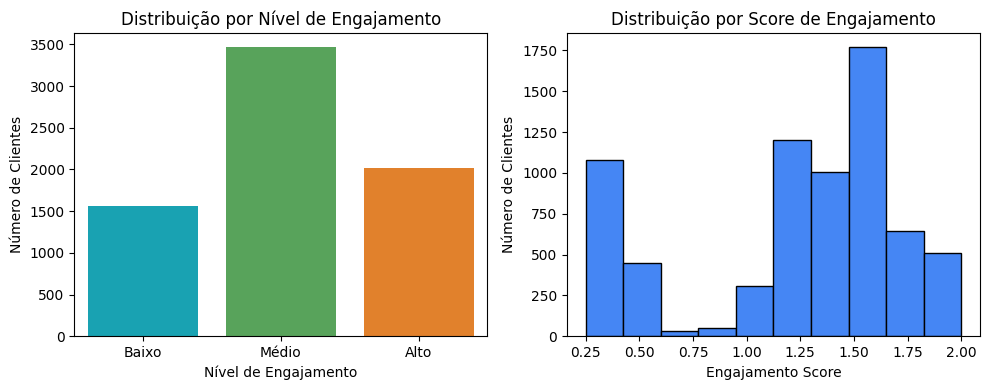

In [97]:
col = 'nivel_engajamento'

#frequência absoluta e relativa dos valores
abs_freq = df[col].value_counts()
rel_freq = df[col].value_counts(normalize=True) * 100
print("Frequência absoluta:\n", abs_freq)
print("\nFrequência relativa (%):\n", rel_freq)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#gráfico de barras por nível de engajamento
sns.countplot(x='nivel_engajamento', data=df, palette=['#00B6CB', '#4CAF50', '#ff7f0e'], order=['Baixo', 'Médio', 'Alto'], ax=axes[0])
axes[0].set_title('Distribuição por Nível de Engajamento')
axes[0].set_xlabel('Nível de Engajamento')
axes[0].set_ylabel('Número de Clientes')

#histograma da distribuição do score
axes[1].hist(df['engajamento_score'], bins=10, color='#4586F4', edgecolor='black')
axes[1].set_title('Distribuição por Score de Engajamento')
axes[1].set_xlabel('Engajamento Score')
axes[1].set_ylabel('Número de Clientes')

plt.tight_layout()
plt.show()

Resultados obtidos de frequência de clientes de acordo com o nível de engajamento:

| Nível de Engajamento | Frequência Absoluta | Frequência Relativa (%) |
|----------------------|---------------------|-------------------------|
| Baixo                | 1561                | 22.16                   |
| Médio                | 3465                | 49.19                   |
| Alto                 | 2017                | 28.63                   |


Ambos os gráficos tem o mesmo perfil de concentração de clientes no nível de engajamento médio, que representa 49,19% da base. Isso significa que a maioria dos clientes tem aderência moderada ao uso das funcionalidades do sistema e uma menor parte da base, que corresponde a 22,16%, tem engajamento alto, podendo ser os clientes com maior tempo de permanência.

**Quase um quarto da base de clientes tem pouca aderência às funcionalidades. Essa parcela de clientes pode apresentar maior risco de churn por uma baixa percepção de valor e aplicabilidade do produto na rotina.**

### **2.3. Análise temporal de tendências**

Aqui faço uma análise temporal para verificar a evolução do churn ao longo do tempo, utilizando a coluna 'Mês churn' para identificar em quais meses ocorreram os cancelamentos e como isso se compara ao total de clientes ativos, em termos absolutos e percentuais (taxa de churn).

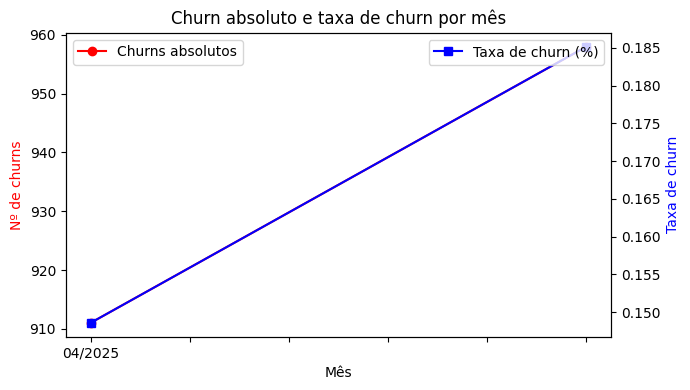

,churns,ativos_inicio_mes,taxa_churn
04/2025,911,6132,0.148565
05/2025,958,5174,0.185157


In [98]:
#filtrar apenas os clientes que deram churn (tem mês de churn não nulo)
churns = df[~df['mes_churn'].isnull()]

#contar churns por mês
churns_mes = churns['mes_churn'].value_counts().sort_index()

#calcular total de clientes ativos por mês (acumulado de clientes que ainda não deram churn até o mês
#Como só temos churn para 04/2025 e 05/2025, e todos os outros são ativos, vou usar esses meses para análise.
ativos_abril = df.shape[0] - churns_mes.loc['04/2025'] if '04/2025' in churns_mes else df.shape[0]
ativos_maio = ativos_abril - churns_mes.loc['05/2025'] if '05/2025' in churns_mes else ativos_abril

#dataFrame de análise temporal
analise_temporal = pd.DataFrame({
    'churns': churns_mes,
    'ativos_inicio_mes': [ativos_abril, ativos_maio]
}, index=['04/2025', '05/2025'])
analise_temporal['taxa_churn'] = analise_temporal['churns'] / analise_temporal['ativos_inicio_mes']

#gráfico de linha para relacionar churns por mês e taxa de churn
fig, ax1 = plt.subplots(figsize=(7,4))
ax2 = ax1.twinx()
analise_temporal['churns'].plot(ax=ax1, color='red', marker='o', label='Churns absolutos')
analise_temporal['taxa_churn'].plot(ax=ax2, color='blue', marker='s', label='Taxa de churn (%)')
ax1.set_ylabel('Nº de churns', color='red')
ax2.set_ylabel('Taxa de churn', color='blue')
ax1.set_xlabel('Mês')
ax1.set_title('Churn absoluto e taxa de churn por mês')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

analise_temporal

No mês de abril/25 houve um total de 911 churns, uma taxa de 14,8% em relação ao total de clientes ativos na base até o início do mês. Já em maio/25 houve um aumento para 958 churns, correspondente a uma taxa de 18,5% sobre os clientes remanescentes do mês anterior.

**Há um aumento evidente de churn entre esses dois meses, o que pode indicar alguma piora na relação com o cliente recentemente, como mudança do produto, reajuste de valor, ida para concorrentes, por exemplo. É importante que a empresa Software S.A investigue o que ocorreu nesse período.**

Como a base só possui esses dois meses, não é possível afirmar que há uma tendência de aumento a longo prazo.

### **2.4. Correlação de variáveis**

Nesse segmento fiz as correlações entre as variáveis e a taxa de churn para analisar o comportamento do cancelamento e validar a hipótese levantada pela equipe de negócio, se houve o aumento real da taxa de churn.

Após análise individual de cada variável, julguei que algumas tem potencial maior para responder à dúvida de negócio, por isso seguirei as correlações com as seguintes variáveis:

* Tipo de empresa
* Tipo de Contrato
* Tipo de Pagamento
* Receita mensal
* Receita total
* Score de engajamento

Além disso, faço correlação entre o engajamento e outras variáveis além de churn, para entender como a aderência ao sistema se relaciona com os outros fatores.

##### Churn x Tipo de empresa

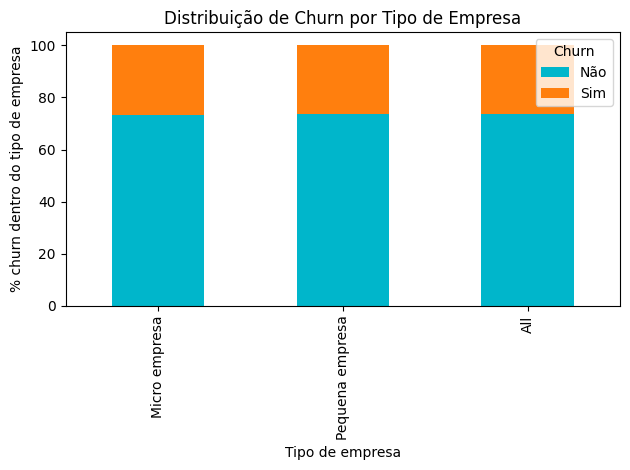

Churn,Não,Sim
Tipo de empresa,,
Micro empresa,73.079128,26.920872
Pequena empresa,73.839662,26.160338
All,73.463013,26.536987


In [99]:
#tabela cruzada
crosstab = pd.crosstab(df['Tipo de empresa'], df['Churn'], margins=True, normalize='index') * 100

#gráfico de barras empilhadas
crosstab = crosstab[['Não', 'Sim']]

ax = crosstab.plot(kind='bar',stacked=True,color=['#00B6CB', '#ff7f0e'])

plt.title('Distribuição de Churn por Tipo de Empresa')
plt.ylabel('% churn dentro do tipo de empresa')
plt.xlabel('Tipo de empresa')
plt.legend(title='Churn', loc='best')
plt.tight_layout()
plt.show()

crosstab


A distribuição geral entre churn e não churn é a mesma que nas categorias micro e pequena empresa, com 73% de clientes que não deram churn e 26% que cancelaram a assinatura.

**Isso mostra que o tipo de empresa, isoladamente, não é determinante para churn nesse caso.**

##### Churn x Funcionários

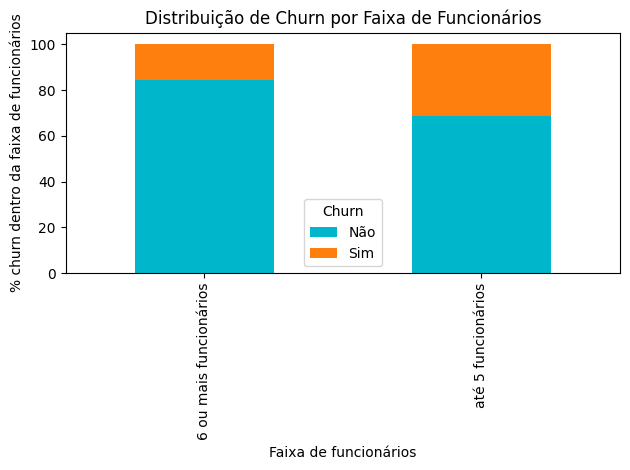

Churn,Não,Sim
Funcionários,,
6 ou mais funcionários,84.549763,15.450237
até 5 funcionários,68.720860,31.279140


In [100]:
crosstab = pd.crosstab(df['Funcionários'], df['Churn'], normalize='index') * 100
crosstab = crosstab[['Não', 'Sim']]

ax = crosstab.plot(kind='bar', stacked=True, color=['#00B6CB', '#ff7f0e'])

plt.title('Distribuição de Churn por Faixa de Funcionários')
plt.ylabel('% churn dentro da faixa de funcionários')
plt.xlabel('Faixa de funcionários')
plt.legend(title='Churn', loc='best')
plt.tight_layout()
plt.show()

crosstab


Empresas categorizadas até 5 funcionários funcionários tem risco de 16%  a mais de churn em relação a empresas com 6 ou mais funcionários. Isso pode indicar que empresas menores são mais sensíveis a fatores do mercado/sistema.

**O número de funcionários, isoladamente, também não é determinante para o churn.**

##### Churn x Tipo de Contrato

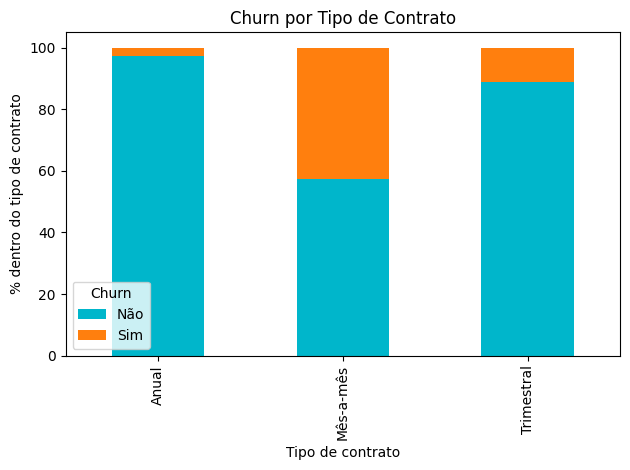

Churn,Não,Sim
Contrato,,
Anual,97.168142,2.831858
Mês-a-mês,57.290323,42.709677
Trimestral,88.730482,11.269518


In [101]:
col = 'Contrato'
crosstab = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

#garante a ordem das categorias
if 'Não' in crosstab.columns and 'Sim' in crosstab.columns:
    crosstab = crosstab[['Não', 'Sim']]
else:
    crosstab = crosstab.reindex(columns=['Não', 'Sim'], fill_value=0)

ax = crosstab.plot(kind='bar',stacked=True,color=['#00B6CB', '#ff7f0e'])
plt.title('Churn por Tipo de Contrato')
plt.ylabel('% dentro do tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.legend(title='Churn', loc='best')
plt.tight_layout()
plt.show()

crosstab


A taxa de churn é muito maior entre os clientes com contrato mensal, planos anuais praticamente não tem churn e os trimestrais também são bem estáveis.

**Esse resultado ressalta a importância de incentivar os clientes a migrarem para assinaturas mais longas, já que o prazo maior de contrato pode ter um risco menor de cancelamento.**

Entretanto, essa correlação pode enganar um pouco porque os clientes com contrato anual às vezes não estão mais usando o produto, mas o churn ainda não foi notado porque ele seria calculado somente a partir do vencimento do contrato. Por isso interessante ter a análise do score de engajamento x churn.

##### Churn x Tipo de Pagamento



Churn,Não,Sim
Tipo de pagamento,,
Boleto - mês a mês,80.893300,19.106700
Boleto - pagamento único,54.714588,45.285412
Cartão de crédito - mês a mês,84.756899,15.243101
Cartão de crédito - pagamento único,83.290155,16.709845
All,73.463013,26.536987


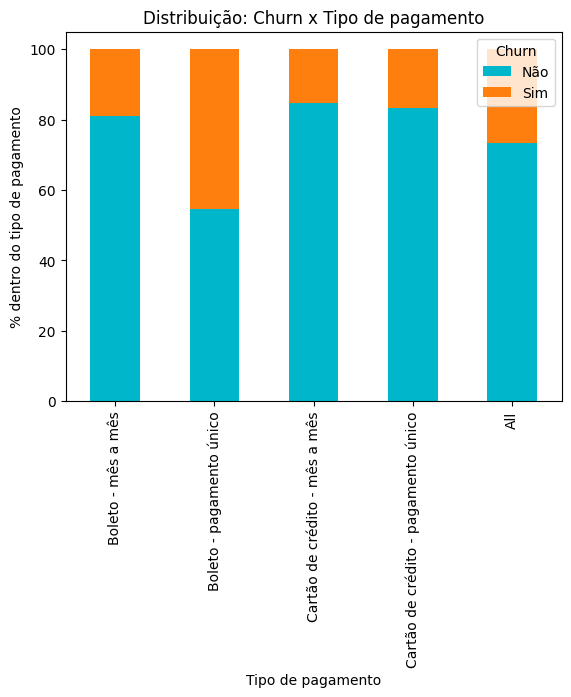

In [102]:
crosstab = pd.crosstab(df['Tipo de pagamento'], df['Churn'], normalize='index', margins=True)*100

crosstab.plot(kind='bar', stacked=True, color=['#00B6CB', '#ff7f0e'])
plt.title('Distribuição: Churn x Tipo de pagamento')
plt.ylabel('% dentro do tipo de pagamento')
plt.xlabel('Tipo de pagamento')
plt.legend(title='Churn');

crosstab

**A proporção de empresas que realiza pagamento único por boleto no grupo de churns é maior em relação às outras modalidades de pagamento, totalizando 45% do total.** Isso reflete o que foi analisado individualmente nessa variável, em que 33,6% dos clientes da empresa Software S.A fazem o pagamento dessa forma.

O churn diminui em contratos com modalidade de pagamento parcelado em boleto ou à vista no crédito, que sugere que os clientes podem ter uma organização financeira melhor com essas formas de pagamento a prazo do que valor integral do contrato à vista.

##### Churn x Receita mensal

/tmp/ipython-input-107964312.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Receita mensal', data=df, palette=['#00B6CB', '#ff7f0e'])


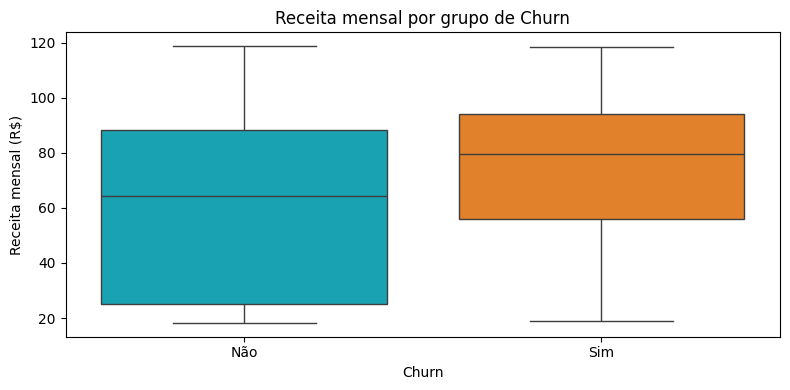

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
Não,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Sim,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


In [103]:
#boxplot para avaliar a distribuição de receita mensal entre o grupo que deu churn (sim) e o que permaneceu com o contrato (não)
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='Receita mensal', data=df, palette=['#00B6CB', '#ff7f0e'])
plt.title('Receita mensal por grupo de Churn')
plt.xlabel('Churn')
plt.ylabel('Receita mensal (R$)')
plt.tight_layout()
plt.show()

#estatísticas resumidas por grupo
grouped = df.groupby('Churn')['Receita mensal'].describe()
grouped

O boxplot relaciona a distribuição da receita mensal entre os clientes que deram churn (sim) e os que não deram (não).

Principais estatísticas entre os grupos:


* Clientes que deram churn tem receita mensal média de R$ 74,4 e

mediana de R$ 79,65

* Clientes que permaneceram apresentam média de receita mensal R$ 61,26 e

 mediana de R$ 74,44


**O gráfico nos mostra que o grupo de clientes que cancelou o contrato tem valores centrais e faixa de receita mais elevados. Clientes de ticket médio mensal maior tem tendência a churn.**



##### Churn x Receita total

/tmp/ipython-input-2783753863.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Receita total', data=df, palette=['#00B6CB', '#ff7f0e'])


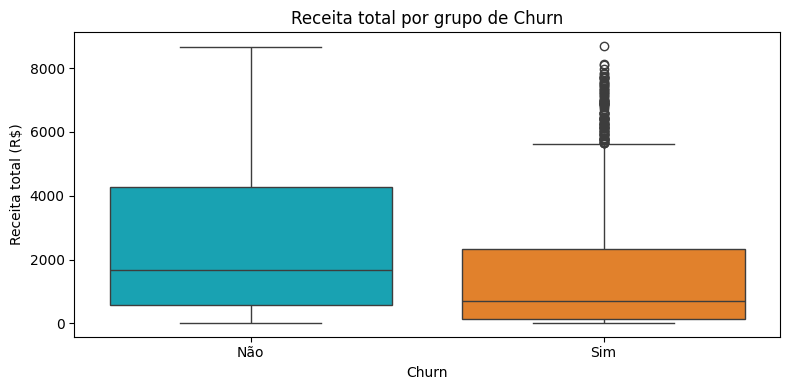

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
Não,5163.0,2555.344141,2329.456984,18.80,577.825,1683.60,4264.125,8672.45
Sim,1869.0,1531.796094,1890.822994,18.85,134.500,703.55,2331.300,8684.80


In [104]:
#boxplot para avaliar a distribuição de receita total entre o grupo que deu churn (sim) e o que permaneceu com o contrato (não)
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='Receita total', data=df, palette=['#00B6CB', '#ff7f0e'])
plt.title('Receita total por grupo de Churn')
plt.xlabel('Churn')
plt.ylabel('Receita total (R$)')
plt.tight_layout()
plt.show()

#estatísticas descritivas por grupo
grouped_total = df.groupby('Churn')['Receita total'].describe()
grouped_total

*Clientes que deram churn* tem receita total média de 1531,79 reais e mediana de 703,55 reais. Há uma grande dispersão entre essas medidas, que pode indicar que em média cancelam mais cedo o contrato ou geram menor receita ao longo do contrato.

*Clientes que permaneceram* apresentam média de receita mensal de 2555,34 e mediana de 1683,60 reais, medidas bem acima dos clientes que deram churn. Isso sugere que quem permanece com o contrato por mais tempo, naturalmente tendem a gerar uma receita acumulada maior.

Alguns clientes que deram churn são outliers, com receitas bem altas. Vale a pena investigar porque esses clientes de alto valor cancelaram, já que não refletem a realidade da maioria dos cancelamentos.

**O churn está concentrado no grupo de clientes que possui menor valor histórico.**





##### Churn x Engajamento

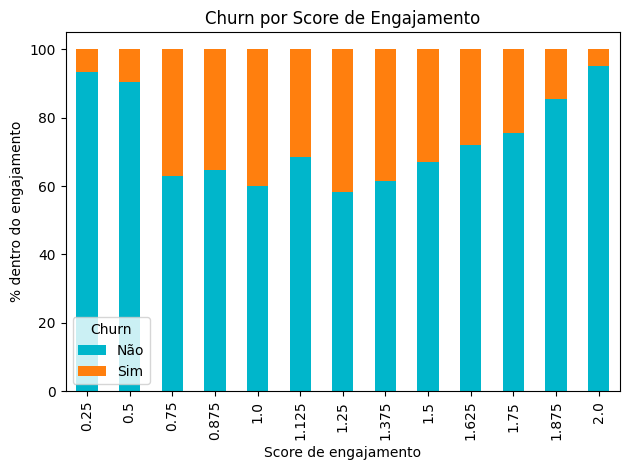

Churn,Não,Sim
engajamento_score,,
0.250,93.425926,6.574074
0.500,90.582960,9.417040
0.750,62.857143,37.142857
0.875,64.583333,35.416667
1.000,60.000000,40.000000
1.125,68.622449,31.377551
1.250,58.271605,41.728395
1.375,61.454183,38.545817
1.500,67.108168,32.891832


In [105]:
col = 'engajamento_score'
crosstab = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

#ordenar para garantir todas as categorias de churn
crosstab = crosstab[['Não', 'Sim']]

ax = crosstab.plot(kind='bar',stacked=True,color=['#00B6CB', '#ff7f0e'])

plt.title('Churn por Score de Engajamento')
plt.ylabel('% dentro do engajamento')
plt.xlabel('Score de engajamento')
plt.legend(title='Churn', loc='best')
plt.tight_layout()
plt.show()

crosstab

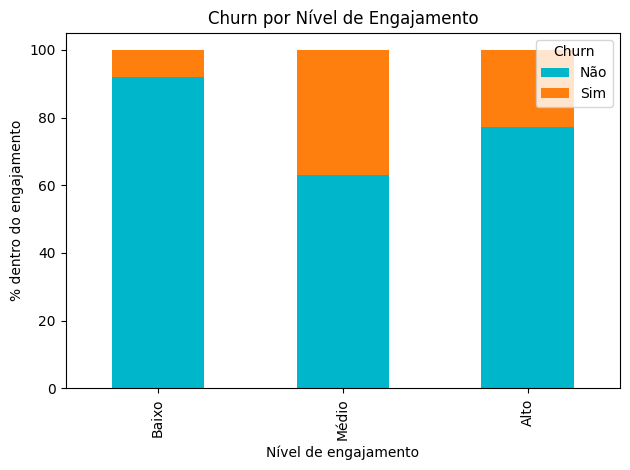

Churn,Não,Sim
nivel_engajamento,,
Baixo,91.928251,8.071749
Médio,62.914863,37.085137
Alto,77.293009,22.706991


In [106]:
col = 'nivel_engajamento'

crosstab = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

crosstab = crosstab[['Não', 'Sim']]

ax = crosstab.plot(kind='bar',stacked=True,color=['#00B6CB', '#ff7f0e'])

plt.title('Churn por Nível de Engajamento')
plt.ylabel('% dentro do engajamento')
plt.xlabel('Nível de engajamento')
plt.legend(title='Churn', loc='best')
plt.tight_layout()
plt.show()

crosstab


In [107]:
from scipy.stats import pearsonr

# Converter a variável Churn para numérica
df['Churn_num'] = df['Churn'].map({'Sim': 1, 'Não': 0})

# Calcular a correlação de Pearson
corr, p_value = pearsonr(df['engajamento_score'], df['Churn_num'])

print(f'Correlação de Pearson entre Engajamento e Churn: {corr:.3f}')
print(f'Valor-p: {p_value:.5f}')


Correlação de Pearson entre Engajamento e Churn: 0.142
Valor-p: 0.00000


O comportamento esperado para o modelo de negócios por assinatura seria que clientes com baixo engajamento apresentem as maiores taxas de churn, por uma baixa aderência ou menor conhecimento da aplicabilidade do sistema, e clientes com médio e alto engajamento tenham menor churn.

Os dois gráficos correlacionam o score e nível de engajamento com o churn. **Porém, ambos evidenciam que as maiores taxas de churn estão presentes no grupo de clientes com score entre 0.75 e 1.375, dentro do nível médio de aderência às features do sistema. Esse grupo tem maior taxa de churn, representando 37% do total.** A taxa diminui a medida que o nível de engajamento aumenta, que é o comportamento esperado.

A correlação de pearson, no valor de 0,125, confirma o que os gráficos mostram, que o enjamento maior ou menor não tem relação clara com a taxa de churn.  

**Essa correlação trouxe um insight valioso sobre o comportamento do cancelamento, em que os clientes com nível médio de engajamento são o grupo com maior risco de churn ao invés de clientes com baixa aderência ao uso do sistema.**

##### Engajamento x Meses de permanência

Adicionalmente à correlação entre as variáveis e o churn, decidi fazer uma correlação entre a aderência ao uso do sistema e os meses de permanência dos clientes nos contratos. Para isso, agrupei os clientes por mês de permanência e score de engajamento desse grupo de clientes. Posteriormente, criei um gráfico de bolhas para verificar a distribuição de clientes por mês de permanência e seu engajamento.

In [108]:
#criar colunas auxiliares para agrupar os clientes por tempo de permanência com o score de engajamento em cada mês

aux = (df.loc[:, ['engajamento_score', 'Meses de permanência ']].groupby('Meses de permanência ', as_index=False).agg(['first', 'count']))

aux.columns = ['_'.join(col).strip() for col in aux.columns]
aux.head()


,Meses de permanência _,engajamento_score_first,engajamento_score_count
0,0,1.500,11
1,1,1.125,613
2,2,1.625,238
3,3,1.750,200
4,4,0.250,176


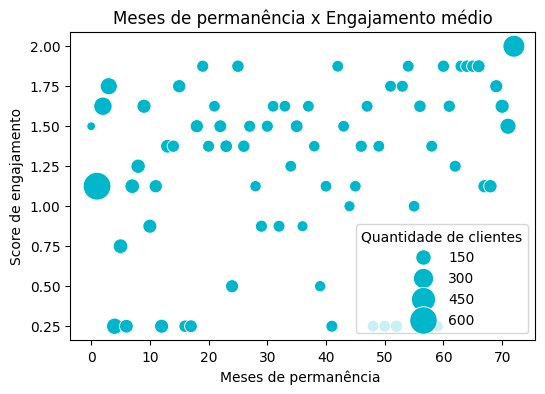

In [109]:
#gráfico para correlação entre engajamento e meses de permanência

plt.figure(figsize=(6, 4))
ax = sns.scatterplot(
    data=aux,
    x='Meses de permanência _',
    y='engajamento_score_first',
    size='engajamento_score_count',
    color='#00B6CB',
    sizes=(40, 400),
    legend=True)

ax.set_title('Meses de permanência x Engajamento médio')
ax.set_xlabel('Meses de permanência ')
ax.set_ylabel('Score de engajamento')
ax.legend(title='Quantidade de clientes')
plt.show()



Como gráfico apresenta grande dispersão sem linearidade aparente, calculei o coeficiente de pearson para analisar a relação entre essas duas variáveis.

In [110]:
from scipy.stats import pearsonr

#calcular a correlação de Pearson
r, p = pearsonr(df['engajamento_score'], df['Meses de permanência '])
print(f"Coeficiente de correlação de Pearson: {r:.3f}")
print(f"Valor-p: {p:.4f}")

#interpretação
if abs(r) < 0.2:
    interpretacao = "correlação muito fraca (quase inexistente)"
elif abs(r) < 0.4:
    interpretacao = "correlação fraca"
elif abs(r) < 0.6:
    interpretacao = "correlação moderada"
elif abs(r) < 0.8:
    interpretacao = "correlação forte"
else:
    interpretacao = "correlação muito forte"

direcao = "positiva" if r > 0 else "negativa"
print(f"Interpretação: Existe uma {interpretacao} e {direcao} entre engajamento e tempo de permanência.")


Coeficiente de correlação de Pearson: 0.243
Valor-p: 0.0000
Interpretação: Existe uma correlação fraca e positiva entre engajamento e tempo de permanência.


Há uma correlação fraca e positiva entre essas variáveis, à medida que o tempo de permanência do cliente aumenta, há uma ligeira tendência de aumentar o engajamento.

Analisando o tamanho dos círculos no gráfico, observa-se uma quantidade significativa de clientes com poucos meses de permanência e médio e alto engajamento. De maneira semelhante, há uma quantidade parecida de clientes com alta permanência (mais de 70 meses) e score de engajamento elevado.

**Há todos os níveis de engajamento distribuídos pelas diversos meses de permanência dos clientes, então não é uma relação causal direta e exclusiva. Não podemos afirmar que a permanência do cliente está diretamente relacionada ao engajamento com o sistema.**

##### Engajamento, Receita e Permanência

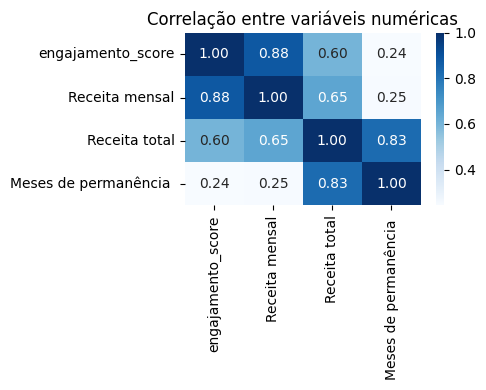

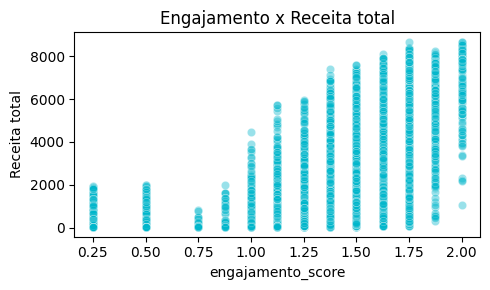

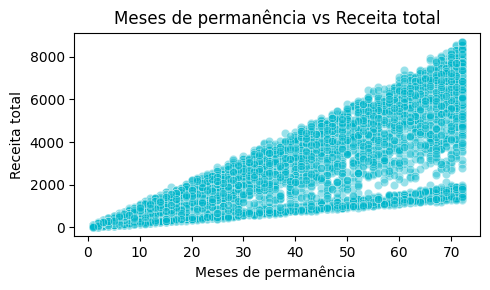

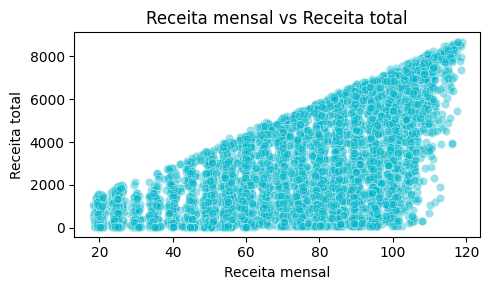

,engajamento_score,Receita mensal,Receita total,Meses de permanência
engajamento_score,1.000000,0.884588,0.601230,0.242813
Receita mensal,0.884588,1.000000,0.651065,0.247900
Receita total,0.601230,0.651065,1.000000,0.825880
Meses de permanência,0.242813,0.247900,0.825880,1.000000


In [111]:
#selecionar as variáveis numéricas relevantes
num_vars = ['engajamento_score', 'Receita mensal', 'Receita total', 'Meses de permanência ']
corr_matrix = df[num_vars].corr()

#mapa de calor de correlação
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlação entre variáveis numéricas')
plt.tight_layout()
plt.show()

#scatterplot engajamento x Receita total
plt.figure(figsize=(5,3))
sns.scatterplot(y='Receita total', x='engajamento_score', color='#00B6CB', data=df, alpha=0.4)
plt.title('Engajamento x Receita total')
plt.tight_layout()
plt.show()

#scatterplot para meses de permanência x Receita total
plt.figure(figsize=(5,3))
sns.scatterplot(x='Meses de permanência ', y='Receita total', color='#00B6CB',data=df, alpha=0.4)
plt.title('Meses de permanência vs Receita total')
plt.tight_layout()
plt.show()

#scatterplot para Receita mensal x Receita total
plt.figure(figsize=(5,3))
sns.scatterplot(x='Receita mensal', y='Receita total', data=df,color='#00B6CB', alpha=0.4)
plt.title('Receita mensal vs Receita total')
plt.tight_layout()
plt.show()

corr_matrix

Cada célula no mapa de calor mostra o coeficiente de correlação de Pearson entre duas variáveis, que pode variar de -1 a +1. Já os gráficos de bolha correlacionam as receitas entre si e receita total com meses de permanência.

*Score de engajamento e Receita mensal (0.88)*: Há uma correlação forte e positiva, sugerindo que clientes com maior receita mensal tendem a ter um score de engajamento mais alto, ou seja, utilizam mais as funcionalidades do sistema.

*Score de engajamento e Receita total (0.60)*: Há uma correlação moderada e positiva. Isso sugere que clientes mais engajados tendem a ter uma receita total acumulada maior.

*Receita mensal e Receita total (0.65):* Há uma correlação moderada e positiva entre essas variáveis. Isso indica que clientes com planos mais caros (maior ticket médio) tendem a gerar uma receita total acumulada maior, que é o esperado para modelos de assinatura. No entanto, o tempo de permanência também influencia a receita total, como ilustrado pelo gráfico de bolhas.

*Meses de permanência e Receita Mensal(0.24):* Correlação fraca e positiva, indicando que o valor do plano não tem relação direta com o tempo de permanência.

**O mapa de calor confirma algumas relações importantes: clientes mais engajados pagam mais por mês e geram mais receita total. A correlação mais forte é entre engajamento e receita mensal. Clientes com maior permanência tendem a se engajar um pouco mais com o sistema, mas essa não é uma relação forte. Outros fatores podem influenciar tanto o engajamento quanto a permanência**.

# **3. Conclusão**

A maioria dos clientes são empresas novas com fundação até 10 anos, de porte pequena ou micro empresa, com até 5 funcionários em sua equipe e com média de permanência de assinatura de 2 anos e 7 meses. Em torno de 65% dos clientes fazem conciliação bancária manual com o sistema ou não fazem. Quando avaliamos a frequência de uso das features do sistema, quase um quarto da base de clientes nunca utilizou esses módulos. Esses fatores apontam um baixo grau de maturidade operacional e menor uso de automação.

A taxa geral de churn é de 26,5%, com aumento de 911 churns em abril para  958 em maio. Houve aumento evidente entre esses dois meses, mas não é possível afirmar que há uma tendência a longo prazo.

O porte da empresa e número de funcionários não tem relação com o churn. Já o tipo de contrato mensal e pagamento por boleto único representam em média 43% dos cancelamentos. O churn está concentrado no grupo de clientes com engajamento médio ao uso do sistema, representando 37% do total. A menor taxa de churn está concentrada no grupo com baixo engajamento, seguido pelo grupo com alto engajamento.

A hipótese inicial de aumento do churn foi validada, com aumento evidente entre os dois meses analisados. Entretanto, esse aumento não está ligado diretamente ao porte da empresa e à aderência ao uso do sistema pelos clientes. O engajamento não é um bom indicador de retenção nesse caso, visto que clientes podem pagar mais e serem engajados, mas não necessariamente permanecerem mais com a assinatura.

Portanto, a retenção dos clientes e menor churn estão mais relacionados ao tipo de contrato e forma de pagamento. Sugerindo que essa retenção pode depender de outros fatores como valor percebido do produto, previsibilidade financeira da empresa do cliente, fluxo de caixa, suporte técnico e efeitos da concorrência, por exemplo. O acompanhamento contínuo desses indicadores é fundamental para antecipar o risco de churn e mapear as estratégias de negócio.

**Recomendações:**

É importante investigar fatores adicionais relacionados à retenção do cliente, como mudanças no suporte técnico e atendimento aos clientes, mudanças no produto, aumento de preço, concorrência com outras empresas do ramo.

•	Incentivar ações para aumentar o engajamento dos clientes nos módulos pouco usados, com objetivo de tornar o sistema mais essencial às operações e aumentar o valor percebido

•	Monitorar frequentemente a taxa de churn e entender com os clientes quais fatores estão relacionados ao cancelamento

•	Incentivar a migração para contratos mais longos, como trimestrais e anuais, que apresentam maior estabilidade

•	Incentivar modalidades de pagamento parcelado ou com crédito para diluir a cobrança, que pode ser relevante para empresas de pequeno porte e com menor estabilidade financeira



